In [9]:
import pandas as pd

from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# the csv file is under the week 2 content
filename = 'C:/MSDS/MachL/Wk6/heart.disease.data.clean.csv'
heart_df = pd.read_csv(filename)
heart_df.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0


In [11]:
# set values of target column to 0 (no heart disease) and 1 (heart disease)
heart_df.loc[heart_df['num'] > 0, 'num'] = 1

In [12]:
heart_df['num'].value_counts()

0    157
1    125
Name: num, dtype: int64

In [13]:
feat_cols = [c for c in heart_df.columns if c != 'num']
# select features and columns from the dataframe as we did in the neural net exercise
features = heart_df[feat_cols].values
targets = heart_df['num'].values
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    targets,
                                                    test_size=0.2,
                                                    random_state=223,
                                                    stratify=targets)

In [14]:
K.clear_session()
inputs = Input(shape=(features.shape[1], ))
# complete the neural net design
x1 = Dense(200, activation='elu')(inputs)
x2 = Dense(50, activation='tanh')(x1)
predictions = Dense(1, activation='sigmoid')(x2)

model = Model(inputs, predictions)
# choose an optimizer and use the correct loss for binary classification
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [15]:
# use the training data to fit the model.  Choose numbers for epochs and the validation split
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_split=0.15,
                    batch_size=500)

Train on 191 samples, validate on 34 samples
Epoch 1/500
191/191 [==============================] - 0s 2ms/step - loss: 0.3087 - acc: 0.5026 - val_loss: 0.2762 - val_acc: 0.5588
Epoch 2/500
191/191 [==============================] - 0s 21us/step - loss: 0.2369 - acc: 0.5812 - val_loss: 0.2425 - val_acc: 0.6471
Epoch 3/500
191/191 [==============================] - 0s 26us/step - loss: 0.2415 - acc: 0.6073 - val_loss: 0.2310 - val_acc: 0.6176
Epoch 4/500
191/191 [==============================] - 0s 31us/step - loss: 0.2264 - acc: 0.6335 - val_loss: 0.2226 - val_acc: 0.6765
Epoch 5/500
191/191 [==============================] - 0s 37us/step - loss: 0.2251 - acc: 0.6545 - val_loss: 0.2185 - val_acc: 0.7353
Epoch 6/500
191/191 [==============================] - 0s 26us/step - loss: 0.2255 - acc: 0.6649 - val_loss: 0.2234 - val_acc: 0.7059
Epoch 7/500
191/191 [==============================] - 0s 42us/step - loss: 0.2274 - acc: 0.6806 - val_loss: 0.2212 - val_acc: 0.7059
Epoch 8/500
191/19

Epoch 62/500
191/191 [==============================] - 0s 32us/step - loss: 0.1708 - acc: 0.7853 - val_loss: 0.1702 - val_acc: 0.8235
Epoch 63/500
191/191 [==============================] - 0s 21us/step - loss: 0.1708 - acc: 0.7696 - val_loss: 0.1712 - val_acc: 0.8235
Epoch 64/500
191/191 [==============================] - 0s 21us/step - loss: 0.1697 - acc: 0.7906 - val_loss: 0.1701 - val_acc: 0.8529
Epoch 65/500
191/191 [==============================] - 0s 21us/step - loss: 0.1689 - acc: 0.7853 - val_loss: 0.1710 - val_acc: 0.8529
Epoch 66/500
191/191 [==============================] - 0s 26us/step - loss: 0.1680 - acc: 0.7853 - val_loss: 0.1701 - val_acc: 0.8235
Epoch 67/500
191/191 [==============================] - 0s 31us/step - loss: 0.1676 - acc: 0.7853 - val_loss: 0.1687 - val_acc: 0.8529
Epoch 68/500
191/191 [==============================] - 0s 26us/step - loss: 0.1665 - acc: 0.7801 - val_loss: 0.1703 - val_acc: 0.8235
Epoch 69/500
191/191 [==============================] -

Epoch 123/500
191/191 [==============================] - 0s 21us/step - loss: 0.1409 - acc: 0.8115 - val_loss: 0.1560 - val_acc: 0.8529
Epoch 124/500
191/191 [==============================] - 0s 31us/step - loss: 0.1406 - acc: 0.8272 - val_loss: 0.1572 - val_acc: 0.8529
Epoch 125/500
191/191 [==============================] - 0s 37us/step - loss: 0.1403 - acc: 0.8115 - val_loss: 0.1559 - val_acc: 0.8529
Epoch 126/500
191/191 [==============================] - 0s 31us/step - loss: 0.1399 - acc: 0.8272 - val_loss: 0.1559 - val_acc: 0.8529
Epoch 127/500
191/191 [==============================] - 0s 31us/step - loss: 0.1393 - acc: 0.8115 - val_loss: 0.1555 - val_acc: 0.8529
Epoch 128/500
191/191 [==============================] - 0s 31us/step - loss: 0.1387 - acc: 0.8272 - val_loss: 0.1557 - val_acc: 0.8529
Epoch 129/500
191/191 [==============================] - 0s 21us/step - loss: 0.1381 - acc: 0.8168 - val_loss: 0.1547 - val_acc: 0.8529
Epoch 130/500
191/191 [=========================

Epoch 184/500
191/191 [==============================] - 0s 32us/step - loss: 0.1133 - acc: 0.8743 - val_loss: 0.1426 - val_acc: 0.8529
Epoch 185/500
191/191 [==============================] - 0s 26us/step - loss: 0.1134 - acc: 0.8586 - val_loss: 0.1419 - val_acc: 0.8235
Epoch 186/500
191/191 [==============================] - 0s 31us/step - loss: 0.1132 - acc: 0.8796 - val_loss: 0.1414 - val_acc: 0.8529
Epoch 187/500
191/191 [==============================] - 0s 42us/step - loss: 0.1131 - acc: 0.8639 - val_loss: 0.1459 - val_acc: 0.8235
Epoch 188/500
191/191 [==============================] - 0s 26us/step - loss: 0.1133 - acc: 0.8743 - val_loss: 0.1402 - val_acc: 0.8529
Epoch 189/500
191/191 [==============================] - 0s 37us/step - loss: 0.1141 - acc: 0.8639 - val_loss: 0.1441 - val_acc: 0.8235
Epoch 190/500
191/191 [==============================] - 0s 21us/step - loss: 0.1129 - acc: 0.8848 - val_loss: 0.1425 - val_acc: 0.8529
Epoch 191/500
191/191 [=========================

Epoch 245/500
191/191 [==============================] - 0s 52us/step - loss: 0.0936 - acc: 0.9005 - val_loss: 0.1388 - val_acc: 0.7941
Epoch 246/500
191/191 [==============================] - 0s 26us/step - loss: 0.0927 - acc: 0.9005 - val_loss: 0.1366 - val_acc: 0.8235
Epoch 247/500
191/191 [==============================] - 0s 21us/step - loss: 0.0926 - acc: 0.9005 - val_loss: 0.1369 - val_acc: 0.8235
Epoch 248/500
191/191 [==============================] - 0s 26us/step - loss: 0.0922 - acc: 0.9005 - val_loss: 0.1397 - val_acc: 0.7941
Epoch 249/500
191/191 [==============================] - 0s 26us/step - loss: 0.0924 - acc: 0.9005 - val_loss: 0.1353 - val_acc: 0.8235
Epoch 250/500
191/191 [==============================] - 0s 21us/step - loss: 0.0923 - acc: 0.8953 - val_loss: 0.1396 - val_acc: 0.7941
Epoch 251/500
191/191 [==============================] - 0s 26us/step - loss: 0.0922 - acc: 0.9005 - val_loss: 0.1335 - val_acc: 0.8235
Epoch 252/500
191/191 [=========================

Epoch 306/500
191/191 [==============================] - 0s 37us/step - loss: 0.0793 - acc: 0.9110 - val_loss: 0.1394 - val_acc: 0.7647
Epoch 307/500
191/191 [==============================] - 0s 26us/step - loss: 0.0791 - acc: 0.9110 - val_loss: 0.1385 - val_acc: 0.7941
Epoch 308/500
191/191 [==============================] - 0s 26us/step - loss: 0.0789 - acc: 0.9110 - val_loss: 0.1384 - val_acc: 0.7941
Epoch 309/500
191/191 [==============================] - 0s 31us/step - loss: 0.0787 - acc: 0.9110 - val_loss: 0.1399 - val_acc: 0.7647
Epoch 310/500
191/191 [==============================] - 0s 37us/step - loss: 0.0785 - acc: 0.9110 - val_loss: 0.1382 - val_acc: 0.7941
Epoch 311/500
191/191 [==============================] - 0s 37us/step - loss: 0.0784 - acc: 0.9110 - val_loss: 0.1396 - val_acc: 0.7647
Epoch 312/500
191/191 [==============================] - 0s 31us/step - loss: 0.0782 - acc: 0.9110 - val_loss: 0.1374 - val_acc: 0.7647
Epoch 313/500
191/191 [=========================

Epoch 367/500
191/191 [==============================] - 0s 31us/step - loss: 0.0695 - acc: 0.9215 - val_loss: 0.1357 - val_acc: 0.7647
Epoch 368/500
191/191 [==============================] - 0s 21us/step - loss: 0.0690 - acc: 0.9162 - val_loss: 0.1367 - val_acc: 0.7941
Epoch 369/500
191/191 [==============================] - 0s 21us/step - loss: 0.0687 - acc: 0.9215 - val_loss: 0.1395 - val_acc: 0.7941
Epoch 370/500
191/191 [==============================] - 0s 47us/step - loss: 0.0688 - acc: 0.9215 - val_loss: 0.1333 - val_acc: 0.7941
Epoch 371/500
191/191 [==============================] - 0s 37us/step - loss: 0.0689 - acc: 0.9162 - val_loss: 0.1423 - val_acc: 0.7941
Epoch 372/500
191/191 [==============================] - 0s 21us/step - loss: 0.0689 - acc: 0.9215 - val_loss: 0.1325 - val_acc: 0.8235
Epoch 373/500
191/191 [==============================] - 0s 26us/step - loss: 0.0688 - acc: 0.9162 - val_loss: 0.1415 - val_acc: 0.7941
Epoch 374/500
191/191 [=========================

Epoch 428/500
191/191 [==============================] - 0s 21us/step - loss: 0.0620 - acc: 0.9110 - val_loss: 0.1485 - val_acc: 0.7647
Epoch 429/500
191/191 [==============================] - 0s 21us/step - loss: 0.0650 - acc: 0.9372 - val_loss: 0.1186 - val_acc: 0.8824
Epoch 430/500
191/191 [==============================] - 0s 26us/step - loss: 0.0664 - acc: 0.9005 - val_loss: 0.1460 - val_acc: 0.7941
Epoch 431/500
191/191 [==============================] - 0s 26us/step - loss: 0.0630 - acc: 0.9424 - val_loss: 0.1283 - val_acc: 0.8235
Epoch 432/500
191/191 [==============================] - 0s 47us/step - loss: 0.0603 - acc: 0.9267 - val_loss: 0.1274 - val_acc: 0.8235
Epoch 433/500
191/191 [==============================] - 0s 21us/step - loss: 0.0595 - acc: 0.9319 - val_loss: 0.1407 - val_acc: 0.7941
Epoch 434/500
191/191 [==============================] - 0s 37us/step - loss: 0.0608 - acc: 0.9372 - val_loss: 0.1264 - val_acc: 0.8529
Epoch 435/500
191/191 [=========================

Epoch 489/500
191/191 [==============================] - 0s 31us/step - loss: 0.0520 - acc: 0.9476 - val_loss: 0.1245 - val_acc: 0.7941
Epoch 490/500
191/191 [==============================] - 0s 32us/step - loss: 0.0518 - acc: 0.9476 - val_loss: 0.1259 - val_acc: 0.7941
Epoch 491/500
191/191 [==============================] - 0s 31us/step - loss: 0.0519 - acc: 0.9476 - val_loss: 0.1214 - val_acc: 0.8235
Epoch 492/500
191/191 [==============================] - 0s 21us/step - loss: 0.0520 - acc: 0.9476 - val_loss: 0.1276 - val_acc: 0.7941
Epoch 493/500
191/191 [==============================] - 0s 21us/step - loss: 0.0523 - acc: 0.9529 - val_loss: 0.1214 - val_acc: 0.8235
Epoch 494/500
191/191 [==============================] - 0s 32us/step - loss: 0.0521 - acc: 0.9476 - val_loss: 0.1278 - val_acc: 0.7941
Epoch 495/500
191/191 [==============================] - 0s 21us/step - loss: 0.0520 - acc: 0.9529 - val_loss: 0.1221 - val_acc: 0.8235
Epoch 496/500
191/191 [=========================

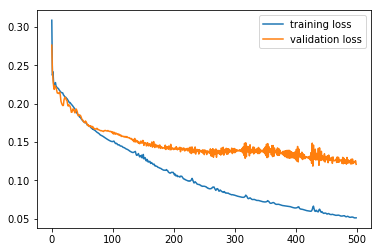

In [16]:
# check losses for overfitting and performance
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
# check accuracy for overfitting and performance
# create the plots similary as above

In [19]:
# this is how we get the [loss, accuracy]
model.evaluate(X_train, y_train)

225/225 [==============================] - 0s 80us/step


[0.061694176656504472, 0.92888888888888888]

In [21]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 123us/step


[0.10856690218574122, 0.85964911130436683]

In [20]:
# use model.evaluate on the test set to see performance

# (bonus) next step: use dropout and/or regularization to prevent overfitting.  Dropout goes after dense layers.  The standard dropout rate is 0.5.  Example:

```python
x1 = Dense(10)(inputs)
x2 = Dropout(0.5)(x1)
preds = Dense(1, activation='sigmoid')(x2)
```

0.5 means half of the connections between x1 and the preds layer are dropped (ignored) during training.  0.1 would mean 10% of the connections would be dropped during training.  For such as small net as we have, the range of 0.1-0.3 makes more sense.

https://keras.io/layers/core/#dropout

https://keras.io/regularizers/

In [59]:
K.clear_session()
inputs = Input(shape=(features.shape[1], ))
x1 = Dense(300, activation='elu')(inputs)
x2 = Dropout(0.1)(x1)
x3 = Dense(50, activation='elu')(x2)
predictions = Dense(1, activation='sigmoid')(x3)

model = Model(inputs, predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_split=0.15,
                    batch_size=1000)

Train on 191 samples, validate on 34 samples
Epoch 1/500
191/191 [==============================] - 0s 2ms/step - loss: 8.8273 - acc: 0.4450 - val_loss: 5.0719 - val_acc: 0.4412
Epoch 2/500
191/191 [==============================] - 0s 37us/step - loss: 4.8494 - acc: 0.4712 - val_loss: 4.0573 - val_acc: 0.5588
Epoch 3/500
191/191 [==============================] - 0s 47us/step - loss: 4.5439 - acc: 0.5026 - val_loss: 5.6753 - val_acc: 0.5588
Epoch 4/500
191/191 [==============================] - 0s 42us/step - loss: 4.8055 - acc: 0.5812 - val_loss: 3.1114 - val_acc: 0.5588
Epoch 5/500
191/191 [==============================] - 0s 52us/step - loss: 4.0064 - acc: 0.5236 - val_loss: 1.2342 - val_acc: 0.5294
Epoch 6/500
191/191 [==============================] - 0s 31us/step - loss: 2.5412 - acc: 0.5916 - val_loss: 3.1068 - val_acc: 0.5000
Epoch 7/500
191/191 [==============================] - 0s 47us/step - loss: 3.8758 - acc: 0.5079 - val_loss: 2.6216 - val_acc: 0.5294
Epoch 8/500
191/19

Epoch 62/500
191/191 [==============================] - 0s 42us/step - loss: 1.7996 - acc: 0.6126 - val_loss: 0.5408 - val_acc: 0.6765
Epoch 63/500
191/191 [==============================] - 0s 37us/step - loss: 1.3394 - acc: 0.6545 - val_loss: 0.4930 - val_acc: 0.7353
Epoch 64/500
191/191 [==============================] - 0s 42us/step - loss: 1.4164 - acc: 0.6492 - val_loss: 0.5135 - val_acc: 0.8235
Epoch 65/500
191/191 [==============================] - 0s 31us/step - loss: 1.3001 - acc: 0.6597 - val_loss: 0.4859 - val_acc: 0.7353
Epoch 66/500
191/191 [==============================] - 0s 37us/step - loss: 1.5506 - acc: 0.6126 - val_loss: 0.4833 - val_acc: 0.7353
Epoch 67/500
191/191 [==============================] - 0s 52us/step - loss: 1.3885 - acc: 0.6387 - val_loss: 0.4533 - val_acc: 0.7647
Epoch 68/500
191/191 [==============================] - 0s 37us/step - loss: 1.4309 - acc: 0.6178 - val_loss: 0.4566 - val_acc: 0.7647
Epoch 69/500
191/191 [==============================] -

Epoch 123/500
191/191 [==============================] - 0s 42us/step - loss: 0.7704 - acc: 0.6754 - val_loss: 0.5250 - val_acc: 0.6765
Epoch 124/500
191/191 [==============================] - 0s 37us/step - loss: 0.8447 - acc: 0.6440 - val_loss: 0.3494 - val_acc: 0.8529
Epoch 125/500
191/191 [==============================] - 0s 42us/step - loss: 0.8795 - acc: 0.6754 - val_loss: 0.3599 - val_acc: 0.8529
Epoch 126/500
191/191 [==============================] - 0s 37us/step - loss: 0.8485 - acc: 0.6440 - val_loss: 0.6222 - val_acc: 0.6471
Epoch 127/500
191/191 [==============================] - 0s 37us/step - loss: 0.7470 - acc: 0.6702 - val_loss: 0.8158 - val_acc: 0.6176
Epoch 128/500
191/191 [==============================] - 0s 37us/step - loss: 0.7888 - acc: 0.6440 - val_loss: 0.3640 - val_acc: 0.8529
Epoch 129/500
191/191 [==============================] - 0s 37us/step - loss: 0.7273 - acc: 0.6859 - val_loss: 0.3642 - val_acc: 0.8529
Epoch 130/500
191/191 [=========================

Epoch 184/500
191/191 [==============================] - 0s 42us/step - loss: 0.5164 - acc: 0.7749 - val_loss: 0.3200 - val_acc: 0.8824
Epoch 185/500
191/191 [==============================] - 0s 47us/step - loss: 0.4821 - acc: 0.7696 - val_loss: 0.3151 - val_acc: 0.8529
Epoch 186/500
191/191 [==============================] - 0s 42us/step - loss: 0.4213 - acc: 0.8168 - val_loss: 0.3376 - val_acc: 0.9118
Epoch 187/500
191/191 [==============================] - 0s 37us/step - loss: 0.5229 - acc: 0.7277 - val_loss: 0.3522 - val_acc: 0.8529
Epoch 188/500
191/191 [==============================] - 0s 42us/step - loss: 0.4768 - acc: 0.7906 - val_loss: 0.3410 - val_acc: 0.8824
Epoch 189/500
191/191 [==============================] - 0s 63us/step - loss: 0.4703 - acc: 0.7853 - val_loss: 0.3103 - val_acc: 0.8529
Epoch 190/500
191/191 [==============================] - 0s 42us/step - loss: 0.4993 - acc: 0.7696 - val_loss: 0.3128 - val_acc: 0.8824
Epoch 191/500
191/191 [=========================

Epoch 245/500
191/191 [==============================] - 0s 31us/step - loss: 0.4299 - acc: 0.7853 - val_loss: 0.3238 - val_acc: 0.8529
Epoch 246/500
191/191 [==============================] - 0s 68us/step - loss: 0.4464 - acc: 0.7958 - val_loss: 0.3105 - val_acc: 0.8529
Epoch 247/500
191/191 [==============================] - 0s 47us/step - loss: 0.4265 - acc: 0.8010 - val_loss: 0.3479 - val_acc: 0.8529
Epoch 248/500
191/191 [==============================] - 0s 37us/step - loss: 0.4378 - acc: 0.7853 - val_loss: 0.3093 - val_acc: 0.8824
Epoch 249/500
191/191 [==============================] - 0s 73us/step - loss: 0.3456 - acc: 0.8639 - val_loss: 0.3158 - val_acc: 0.8529
Epoch 250/500
191/191 [==============================] - 0s 42us/step - loss: 0.4004 - acc: 0.8377 - val_loss: 0.3103 - val_acc: 0.8824
Epoch 251/500
191/191 [==============================] - 0s 63us/step - loss: 0.4671 - acc: 0.7644 - val_loss: 0.3230 - val_acc: 0.8824
Epoch 252/500
191/191 [=========================

Epoch 306/500
191/191 [==============================] - 0s 47us/step - loss: 0.3209 - acc: 0.8429 - val_loss: 0.3182 - val_acc: 0.8824
Epoch 307/500
191/191 [==============================] - 0s 32us/step - loss: 0.3590 - acc: 0.8325 - val_loss: 0.3159 - val_acc: 0.8529
Epoch 308/500
191/191 [==============================] - 0s 37us/step - loss: 0.3514 - acc: 0.8272 - val_loss: 0.3264 - val_acc: 0.8529
Epoch 309/500
191/191 [==============================] - 0s 37us/step - loss: 0.3516 - acc: 0.8272 - val_loss: 0.3328 - val_acc: 0.8824
Epoch 310/500
191/191 [==============================] - 0s 32us/step - loss: 0.3504 - acc: 0.8429 - val_loss: 0.3288 - val_acc: 0.8824
Epoch 311/500
191/191 [==============================] - 0s 37us/step - loss: 0.3561 - acc: 0.8272 - val_loss: 0.3360 - val_acc: 0.8529
Epoch 312/500
191/191 [==============================] - 0s 37us/step - loss: 0.3764 - acc: 0.7958 - val_loss: 0.3428 - val_acc: 0.8529
Epoch 313/500
191/191 [=========================

Epoch 367/500
191/191 [==============================] - 0s 37us/step - loss: 0.3363 - acc: 0.8691 - val_loss: 0.3869 - val_acc: 0.8529
Epoch 368/500
191/191 [==============================] - 0s 68us/step - loss: 0.3416 - acc: 0.8377 - val_loss: 0.3868 - val_acc: 0.8235
Epoch 369/500
191/191 [==============================] - 0s 42us/step - loss: 0.3216 - acc: 0.8482 - val_loss: 0.3776 - val_acc: 0.8529
Epoch 370/500
191/191 [==============================] - 0s 37us/step - loss: 0.3302 - acc: 0.8586 - val_loss: 0.3626 - val_acc: 0.8529
Epoch 371/500
191/191 [==============================] - 0s 47us/step - loss: 0.3274 - acc: 0.8482 - val_loss: 0.3525 - val_acc: 0.8529
Epoch 372/500
191/191 [==============================] - 0s 68us/step - loss: 0.3210 - acc: 0.8796 - val_loss: 0.3459 - val_acc: 0.8529
Epoch 373/500
191/191 [==============================] - 0s 47us/step - loss: 0.2877 - acc: 0.8796 - val_loss: 0.3476 - val_acc: 0.9118
Epoch 374/500
191/191 [=========================

Epoch 428/500
191/191 [==============================] - 0s 42us/step - loss: 0.2554 - acc: 0.8848 - val_loss: 0.4052 - val_acc: 0.8235
Epoch 429/500
191/191 [==============================] - 0s 42us/step - loss: 0.3097 - acc: 0.8691 - val_loss: 0.4111 - val_acc: 0.8235
Epoch 430/500
191/191 [==============================] - 0s 37us/step - loss: 0.2859 - acc: 0.8848 - val_loss: 0.4033 - val_acc: 0.8235
Epoch 431/500
191/191 [==============================] - 0s 37us/step - loss: 0.3378 - acc: 0.8639 - val_loss: 0.4220 - val_acc: 0.7941
Epoch 432/500
191/191 [==============================] - 0s 37us/step - loss: 0.2971 - acc: 0.8743 - val_loss: 0.3788 - val_acc: 0.8235
Epoch 433/500
191/191 [==============================] - 0s 52us/step - loss: 0.2974 - acc: 0.8482 - val_loss: 0.3867 - val_acc: 0.8529
Epoch 434/500
191/191 [==============================] - 0s 63us/step - loss: 0.2905 - acc: 0.8534 - val_loss: 0.3769 - val_acc: 0.8529
Epoch 435/500
191/191 [=========================

Epoch 489/500
191/191 [==============================] - 0s 47us/step - loss: 0.2652 - acc: 0.9058 - val_loss: 0.3814 - val_acc: 0.8235
Epoch 490/500
191/191 [==============================] - 0s 37us/step - loss: 0.2277 - acc: 0.9058 - val_loss: 0.3819 - val_acc: 0.8235
Epoch 491/500
191/191 [==============================] - 0s 31us/step - loss: 0.2905 - acc: 0.8743 - val_loss: 0.3961 - val_acc: 0.8529
Epoch 492/500
191/191 [==============================] - 0s 32us/step - loss: 0.2765 - acc: 0.8953 - val_loss: 0.3932 - val_acc: 0.8529
Epoch 493/500
191/191 [==============================] - 0s 63us/step - loss: 0.2438 - acc: 0.8796 - val_loss: 0.3914 - val_acc: 0.8235
Epoch 494/500
191/191 [==============================] - 0s 42us/step - loss: 0.2379 - acc: 0.8848 - val_loss: 0.4094 - val_acc: 0.8529
Epoch 495/500
191/191 [==============================] - 0s 47us/step - loss: 0.2972 - acc: 0.8848 - val_loss: 0.3875 - val_acc: 0.8235
Epoch 496/500
191/191 [=========================

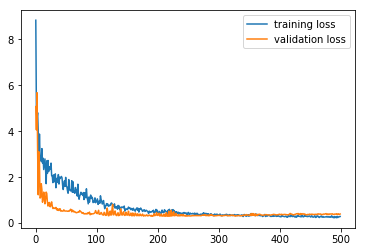

In [61]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

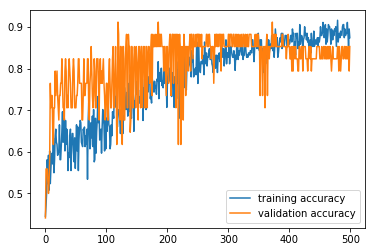

In [62]:
plt.plot(history.history['acc'], label = 'training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

In [63]:
model.evaluate(X_train, y_train)

225/225 [==============================] - 0s 67us/step


[0.2477021142674817, 0.89333333333333331]

In [64]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 193us/step


[0.47791945725156548, 0.87719297095348958]